In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Iris Dataset

Como no podía ser de otra manera, vas a entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Te dejamos algunas consignas de guía.

1. Cargar los datos. Usar la función `load_iris` de Scikit-Learn. ¿Qué tipo de dato devuelve? Pasar a un dataframe de Pandas (¡Googlear!). Prestar atención a `target` y a `target_names`.

In [2]:
# COMPLETAR
from sklearn import datasets
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
# COMPLETAR
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
#display(df.head())

df = pd.DataFrame(data= np.append(iris['data'], iris['target'].reshape(-1,1), axis=1), columns= iris['feature_names'] + ['target'])
display(df.head())

df[['target']] = df[['target']].applymap(np.int64)

display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2. Realiza un `pairplot` de Seaborn. Elige dos variables predictoras - atributos - que te parezca que separan correctamente las clases. ¿Cuán fácil - o difícil - te parece que será la tarea de clasificación?

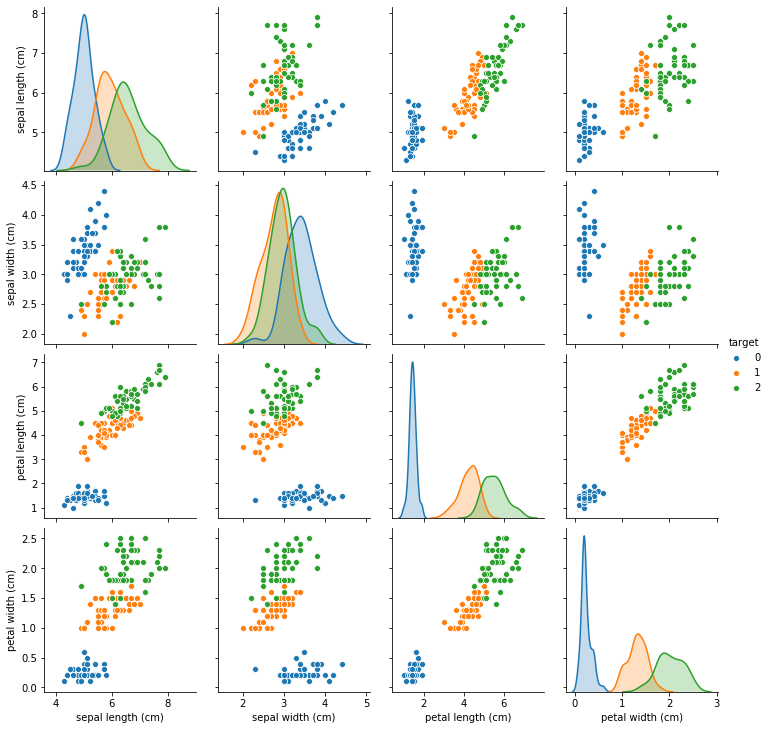

In [4]:
# COMPLETAR
import seaborn as sns

graph = sns.pairplot(data=df, hue="target")

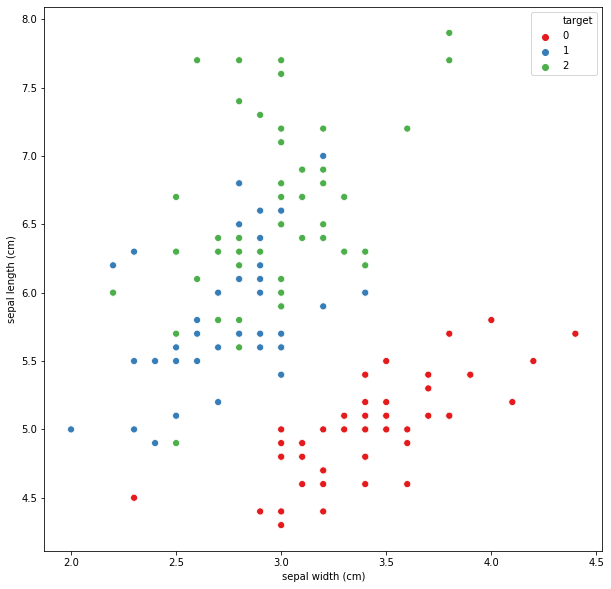

In [5]:
# COMPLETAR
plt.figure(figsize=(10,10))
sns.scatterplot(x="sepal width (cm)", y="sepal length (cm)", data=df, hue='target', palette="Set1", s=50)

3. Separar del dataframe los atributos que elegiste (recuerda empezar por dos) y las etiquetas. Llamar `X` a los features e `y` a las etiquetas.

In [6]:
# COMPLETAR
X = df[['sepal width (cm)', 'sepal length (cm)']]

In [7]:
# COMPLETAR
y = df[['target']]

4. Crear un DecisionTreeClassifier con `max_depth = 2` y `random_state = 42`.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier(max_depth=3, random_state = 42)

5. Entrenar el DecisionTreeClassifier que creaste.

In [9]:
# COMPLETAR
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

6. Explorar algunas características del modelo entrenado.

In [10]:
print(tree.classes_)
print(tree.n_classes_)
print(tree.max_features_)
print(tree.feature_importances_)

[0 1 2]
3
2
[0.23240795 0.76759205]


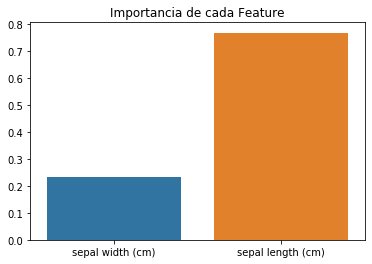

In [11]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

7. Predecir con el modelo las etiquetas sobre todo `X`.

In [12]:
# COMPLETAR
y_pred = tree.predict(X)

8. Evaluar la performance del modelo usando `accuracy_score` y `confusion_matrix`. ¿Cuáles clases se confunden entre sí?

In [13]:
# COMPLETAR
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.8133333333333334

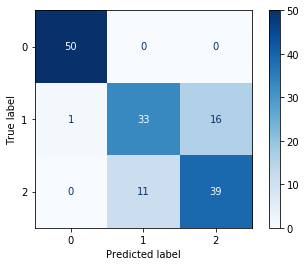

In [14]:
# COMPLETAR
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')

9. Visualiza las fronteras de decisión obtenidas. Te dejamos el código para hacerlo:

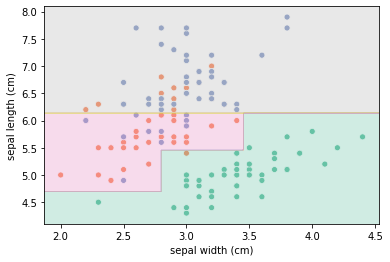

In [15]:
plt.figure()
ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=y.target, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

10. ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`?¿Y con las fronteras de decisión obtenidas? Vuelve a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con valores más altos de `max_depth`.  
* __max_depth__ _refiere a la profundidad máxima del árbol. A medida que aumenta, los nodos se expanden, haciendo quelas hojas sean puras más o contengan menos de min_samples_split samples. Ésto hace que __aumente el desempeño__, pero tendamos al __sobreajuste__.
Para reducir el consumo de memoria, la complejidad y el tamaño de los árboles deben controlarse estableciendo esos valores de parámetros.*

*  Para ayudarnos a encontrar el término medio entre la complejidad del modelo y su ajuste a los datos, podemos ayudarnos de herramientas gráficas. Por ejemplo podríamos crear diferentes modelos, con distintos grados de complejidad y luego graficar la precisión en función de la complejidad.

In [16]:
tree = DecisionTreeClassifier(max_depth=10, random_state = 42)

In [17]:
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
y_pred = tree.predict(X)

In [19]:
accuracy_score(y,y_pred)

0.9133333333333333

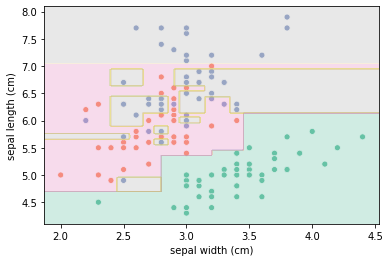

In [20]:
plt.figure()
ax = sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=y.target, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()

11. Vuelve a entrenar, pero esta vez agregando más features a `X`. ¿Mejora o empeora el desempeño?¿Qué ocurre con las fronteras de decisión?¿Tendrá alguna relación la cantidad de features con `max_depth` óptimo?

In [21]:
X = df[['sepal width (cm)', 'sepal length (cm)', 'petal length (cm)']]

In [22]:
y = df[['target']]

In [23]:
tree = DecisionTreeClassifier(max_depth=10, random_state = 42)

In [24]:
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [25]:
y_pred = tree.predict(X)

In [26]:
accuracy_score(y,y_pred) # El desempeño mejora

1.0

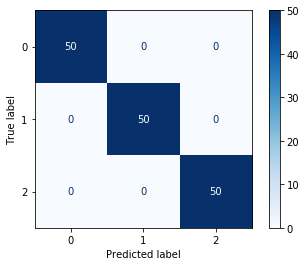

In [27]:
plot_confusion_matrix(tree, X, y, cmap=plt.cm.Blues, values_format = '.0f')

12. **Para pensar:** ¿en qué consistirá un árbol de decisión sobre un único atributo? Por ejemplo, el largo del pétalo.

* Cuando las hojas contienen muestras de una sola clase, se dice que son hojas puras y ya no se pueden crear más ramas a partir de ellas.

* Tenemos __dos tipos__ de árboles de decisión:  
    1. De Clasificación: cuando las variables son __discretas__, que tienen un nro. contable de valores en un intervalo cualquiera.  
    2. De Regresión: cuando las variables son __contínuas__, que tienen un número infinito.